In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install tensorflow==2.0.0
!pip install tensorflow-gpu==2.0.0-beta0
!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd


     |████████████████████████████████| 86.3MB 48kB/s 
     |████████████████████████████████| 450kB 50.4MB/s 
     |████████████████████████████████| 3.8MB 57.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=23c3bd3fb0c53294700095939461253073206079085f694e5306ff4c1af00dea
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: t

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow import keras

In [0]:
pd.set_option("display.precision", 8)

#Training:


In [0]:
data_root='/content/drive/My Drive/image dataset/House'

In [0]:
IMAGE_SHAPE = (224, 224)

TRAINING_DATA_DIR = str(data_root)

print(TRAINING_DATA_DIR);

datagen_kwargs = dict(rescale=1./255, validation_split=.20)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(

TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
class_mode='categorical',
target_size=IMAGE_SHAPE)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
class_mode='categorical',
target_size=IMAGE_SHAPE)



/content/drive/My Drive/InCity Image classification/image dataset/House
Found 57 images belonging to 4 classes.
Found 230 images belonging to 4 classes.


In [0]:

image_batch_train, label_batch_train = next(iter(train_generator))

print("Image batch shape: ", image_batch_train.shape)

print("Label batch shape: ", label_batch_train.shape)

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[0])

dataset_labels = np.array([key.title() for key, value in dataset_labels])

print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 4)
['Kutcha ' 'None' 'Pucca House' 'Semi_Pukka']


In [0]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(train_generator,epochs=11,verbose=1,steps_per_epoch=steps_per_epoch,validation_data=valid_generator,validation_steps=val_steps_per_epoch).history

Epoch 1/11
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


8/8 [==============================] - 123s 15s/step - loss: 1.6681 - acc: 0.2808 - val_loss: 1.2435 - val_acc: 0.4737
Epoch 2/11
8/8 [==============================] - 1s 71ms/step - loss: 1.2058 - acc: 0.4434 - val_loss: 0.8785 - val_acc: 0.5965
Epoch 3/11
8/8 [==============================] - 1s 115ms/step - loss: 1.0196 - acc: 0.5352 - val_loss: 0.6754 - val_acc: 0.8246
Epoch 4/11
8/8 [==============================] - 1s 115ms/step - loss: 0.7560 - acc: 0.6940 - val_loss: 0.6106 - val_acc: 0.8070
Epoch 5/11
8/8 [==============================] - 1s 114ms/step - loss: 0.6802 - acc: 0.7232 - val_loss: 0.4984 - val_acc: 0.8596
Epoch 6/11
8/8 [==============================] - 1s 115ms/step - loss: 0.6607 - acc: 0.7686 - val_loss: 0.4695 - val_acc: 0.8596
Epoch 7/11
8/8 [==============================] - 1s 120ms/step - loss: 0.4893 - acc: 0.8067 - val_loss: 0.4741 - val_acc: 0.8246
Epoch 8/11
8/8 [==============================] - 1s 126ms/step - loss: 0.4743 - acc: 0.7539 - val_los

In [0]:
val_image_batch, val_label_batch = next(iter(valid_generator))

true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [0]:
tf_model_predictions = model.predict(val_image_batch)

tf_pred_dataframe = pd.DataFrame(tf_model_predictions)

tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")

tf_pred_dataframe

Prediction results for the first elements


,Kutcha,None,Pucca House,Semi_Pukka
0,0.68295735,0.00975070,0.01632295,0.29096892
1,0.00122081,0.00086525,0.97873688,0.01917705
2,0.03192089,0.00350960,0.10377095,0.86079860
3,0.17225932,0.00441904,0.56992054,0.25340116
4,0.00277314,0.96285176,0.02639424,0.00798089
5,0.10597288,0.00176694,0.50855511,0.38370502
6,0.18876535,0.01361949,0.59611428,0.20150085
7,0.93181247,0.00195936,0.00148163,0.06474662
8,0.87319779,0.00797397,0.02003241,0.09879576
9,0.96603882,0.00497257,0.01569894,0.01328969


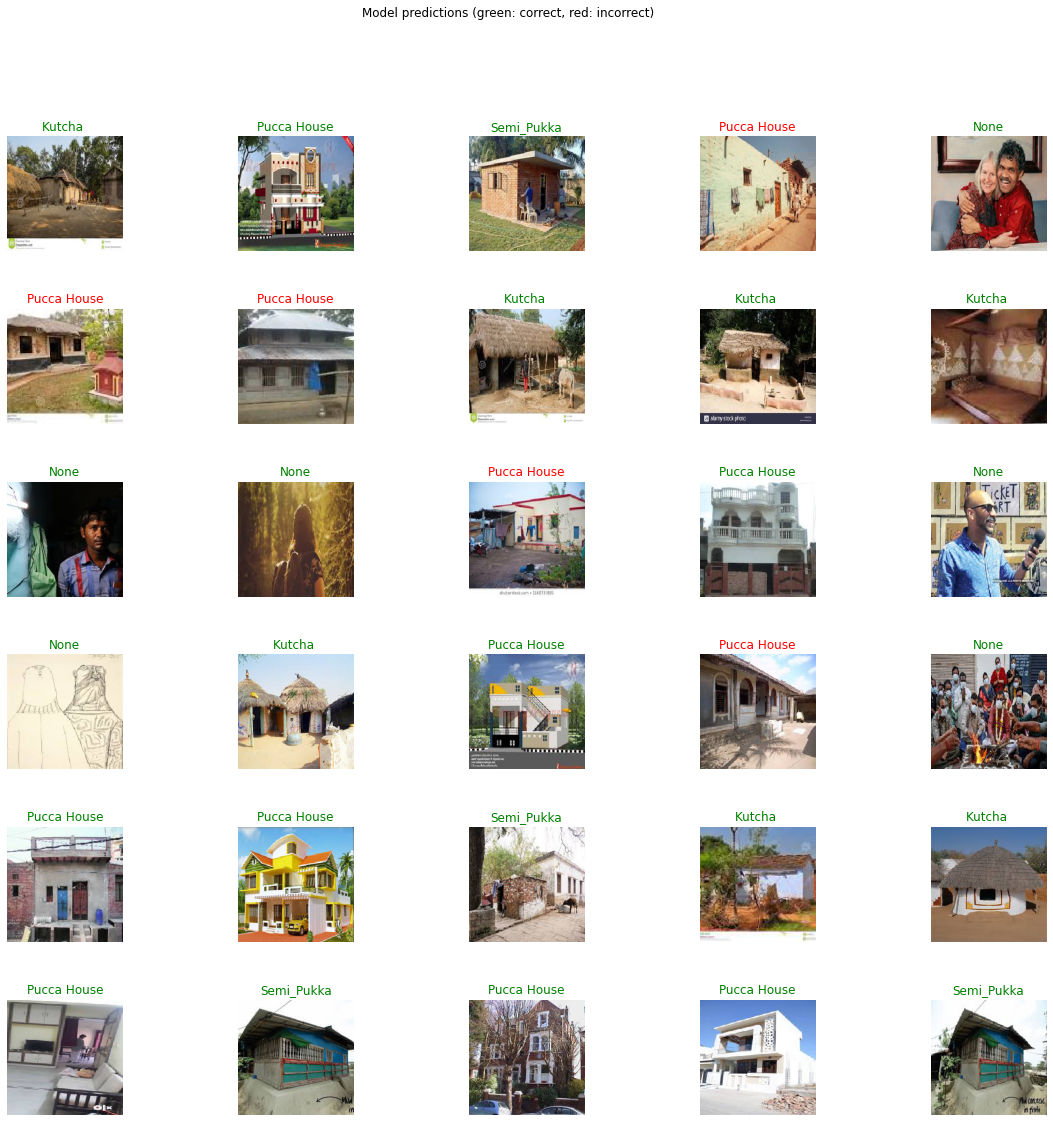

In [0]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [0]:
import tensorflow as tf
from tensorflow import keras


# Testing on Random Image:

1.   PUT YOUR IMAGE ADDRESS IN THE *path* SHOWN BELOW



In [0]:
path = ''
from keras.preprocessing import image
img_width, img_height = 224,224
img = image.load_img(path, target_size = (img_width, img_height))
img = image.img_to_array(img)
img = img/255
img = np.expand_dims(img, axis = 0)

a = model.predict(img)
max_prob = np.amax(a)
l = np.argmax(a)

x = dataset_labels.tolist()
m = x.index('None')
 
print(a)
print(x)
if(max_prob>=0.9):
  print('The image belongs to category:',dataset_labels[l], ' with a score of',max_prob)
#a[0,m] is the noneclass probability
elif(a[0,m]<0.1 and 0.6<max_prob<0.9):
  print('The image belongs to category:',dataset_labels[l], ' with a score of',max_prob)
elif(a[0,m]>0.25):
  print('Image belongs to none class') 
else:
  print('Image belongs to none class') 

[[0.5377112  0.00213263 0.00907675 0.4510794 ]]
['Kutcha ', 'None', 'Pucca House', 'Semi_Pukka']
Image belongs to none class
